Join the data from Part 1 with the data from Part 2 to create a new dataframe.

In [1]:
import pandas as pd

In [80]:
import seaborn as sns

In [3]:
# import foursquare results as a dataframe
foursquare_df = pd.read_csv('../data/foursquare_results.csv') 
foursquare_df = foursquare_df.drop(columns=foursquare_df.columns[0], axis=1) # remove duplicated index column
foursquare_df

,distance,name,popularity,rating,latitude,longitude,category
0,37,V-Face,0.963409,NaN,53.350230,-6.279696,Vegan and Vegetarian Restaurant
1,177,Light House Cinema,0.988546,9.1,53.350230,-6.279696,Indie Movie Theater
2,250,Nutbutter,0.957725,NaN,53.350230,-6.279696,Poke Restaurant
3,285,JJ's Bar,0.995858,8.3,53.350230,-6.279696,Cocktail Bar
4,286,Token,0.974035,8.7,53.350230,-6.279696,Arcade
...,...,...,...,...,...,...,...
1135,425,Copper + Straw,0.992345,NaN,53.342081,-6.275233,Coffee Shop
1136,459,Bittersweet,0.970151,6.4,53.342081,-6.275233,Café
1137,463,Underdog,0.999115,NaN,53.342081,-6.275233,Beer Bar
1138,486,Queen of Tarts,0.979320,9.1,53.342081,-6.275233,Bakery


In [5]:
# import yelp results as a dataframe
yelp_df = pd.read_csv('../data/yelp_results.csv') 
yelp_df = yelp_df.drop(columns=yelp_df.columns[0], axis=1) # remove duplicated index column
yelp_df

,distance,name,review_count,rating,latitude,longitude,category
0,45.574658,Lavanda,5,4.5,53.350230,-6.279696,Modern European
1,64.668846,Namaste India,27,3.5,53.350230,-6.279696,Indian
2,92.167605,Delaneys,6,3.5,53.350230,-6.279696,Pubs
3,119.866129,The Cobblestone,122,4.5,53.350230,-6.279696,Pubs
4,133.331760,Walshs,17,4.5,53.350230,-6.279696,Pubs
...,...,...,...,...,...,...,...
2275,194.604888,Mother Red Caps,1,3.0,53.342081,-6.275233,Pubs
2276,204.609678,Ginger Cafe&Deli,1,5.0,53.342081,-6.275233,Cafes
2277,219.192786,Vincenzo's Pizzeria,8,3.5,53.342081,-6.275233,Pizza
2278,226.257635,Coke Lane Pizza @ Lucky's,2,4.0,53.342081,-6.275233,Pizza


In [7]:
foursquare_df.shape

(1140, 7)

In [16]:
foursquare_df.dtypes

distance        int64
name           object
popularity    float64
rating        float64
latitude      float64
longitude     float64
category       object
dtype: object

In [8]:
yelp_df.shape

(2280, 7)

In [17]:
yelp_df.dtypes

distance        float64
name             object
review_count      int64
rating          float64
latitude        float64
longitude       float64
category         object
dtype: object

In [19]:
# examine shared results for each location from each database
# use an inner join approach
merged_df = pd.merge(foursquare_df, yelp_df, on=['name','latitude','longitude'], suffixes=('_fs','_y'))
merged_df

,distance_fs,name,popularity,rating_fs,latitude,longitude,category_fs,distance_y,review_count,rating_y,category_y
0,171,Bridge Tavern,0.973007,NaN,53.357841,-6.251557,Pub,186.892382,1,5.0,Pubs
1,210,Savoy Take Away,0.944214,NaN,53.357841,-6.251557,Fast Food Restaurant,210.825748,5,3.5,Fish & Chips
2,222,Wallace's Asti,0.978148,7.8,53.357841,-6.251557,Wine Bar,229.058173,21,4.5,Italian
3,339,El Grito Mexican Taqueria,0.978263,8.7,53.357841,-6.251557,Mexican Restaurant,340.057409,49,4.5,Mexican
4,506,Hill 16 Bar,0.964838,NaN,53.357841,-6.251557,Pub,505.086435,4,3.5,Pubs
...,...,...,...,...,...,...,...,...,...,...,...
152,163,Wuff,0.967094,8.7,53.348800,-6.281637,Bistro,158.485452,120,4.5,Breakfast & Brunch
153,57,Peter's Pub,0.989146,7.0,53.340927,-6.262501,Pub,55.075303,45,4.0,Pubs
154,316,Toners Pub,0.970979,8.2,53.336597,-6.248109,Beer Bar,315.847984,38,4.0,Pubs
155,25,Foggy Dew,0.993802,7.9,53.344603,-6.263371,Pub,10.896112,30,3.5,Pubs


_Data validation note: only 157 rows (out of a potential maximum of 3420) are shared between the two DataFrames._

In [47]:
# examine total results from both dataframes using an outer join approach
merged_outer_df = pd.merge(foursquare_df, yelp_df, how='outer', on=['name','latitude','longitude'], suffixes=('_fs','_y'))
merged_outer_df

,distance_fs,name,popularity,rating_fs,latitude,longitude,category_fs,distance_y,review_count,rating_y,category_y
0,37.0,V-Face,0.963409,NaN,53.350230,-6.279696,Vegan and Vegetarian Restaurant,NaN,NaN,NaN,NaN
1,177.0,Light House Cinema,0.988546,9.1,53.350230,-6.279696,Indie Movie Theater,NaN,NaN,NaN,NaN
2,250.0,Nutbutter,0.957725,NaN,53.350230,-6.279696,Poke Restaurant,NaN,NaN,NaN,NaN
3,285.0,JJ's Bar,0.995858,8.3,53.350230,-6.279696,Cocktail Bar,NaN,NaN,NaN,NaN
4,286.0,Token,0.974035,8.7,53.350230,-6.279696,Arcade,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
3259,NaN,Mother Red Caps,NaN,NaN,53.342081,-6.275233,NaN,194.604888,1.0,3.0,Pubs
3260,NaN,Ginger Cafe&Deli,NaN,NaN,53.342081,-6.275233,NaN,204.609678,1.0,5.0,Cafes
3261,NaN,Vincenzo's Pizzeria,NaN,NaN,53.342081,-6.275233,NaN,219.192786,8.0,3.5,Pizza
3262,NaN,Coke Lane Pizza @ Lucky's,NaN,NaN,53.342081,-6.275233,NaN,226.257635,2.0,4.0,Pizza


In [48]:
merged_outer_df.head(10)

,distance_fs,name,popularity,rating_fs,latitude,longitude,category_fs,distance_y,review_count,rating_y,category_y
0,37.0,V-Face,0.963409,NaN,53.35023,-6.279696,Vegan and Vegetarian Restaurant,NaN,NaN,NaN,NaN
1,177.0,Light House Cinema,0.988546,9.1,53.35023,-6.279696,Indie Movie Theater,NaN,NaN,NaN,NaN
2,250.0,Nutbutter,0.957725,NaN,53.35023,-6.279696,Poke Restaurant,NaN,NaN,NaN,NaN
3,285.0,JJ's Bar,0.995858,8.3,53.35023,-6.279696,Cocktail Bar,NaN,NaN,NaN,NaN
4,286.0,Token,0.974035,8.7,53.35023,-6.279696,Arcade,NaN,NaN,NaN,NaN
5,287.0,The Reserve Bar,0.989603,7.5,53.35023,-6.279696,Whisky Bar,NaN,NaN,NaN,NaN
6,291.0,Old Jameson Distillery,0.998886,8.9,53.35023,-6.279696,Tour Provider,NaN,NaN,NaN,NaN
7,297.0,Proper Order Coffee Co.,0.984347,8.0,53.35023,-6.279696,Café,NaN,NaN,NaN,NaN
8,331.0,Bonobo,0.993887,8.5,53.35023,-6.279696,Bar,NaN,NaN,NaN,NaN
9,362.0,Wuff,0.967094,8.7,53.35023,-6.279696,Bistro,NaN,NaN,NaN,NaN


In [15]:
# examine number of unique business names that are in the outer merged dataframe
merged_outer_df.name.unique().size

1216

In [23]:
# explore descriptive statistics for numeric columns
merged_outer_df.describe(include='number')

,distance_fs,popularity,rating_fs,latitude,longitude,distance_y,review_count,rating_y
count,1141.000000,1121.000000,769.000000,3264.000000,3264.000000,2280.000000,2280.000000,2280.000000
mean,281.910605,0.941896,7.806762,53.345510,-6.264507,225.370885,19.840351,3.773904
std,138.128706,0.132955,0.888120,0.007554,0.017788,145.417748,37.115665,0.843294
min,15.000000,0.026736,5.000000,53.330091,-6.310015,2.891065,1.000000,1.000000
25%,170.000000,0.959268,7.400000,53.339764,-6.275233,115.094788,2.000000,3.500000
50%,278.000000,0.975092,7.900000,53.344603,-6.263232,200.006908,6.000000,4.000000
75%,380.000000,0.988374,8.500000,53.350929,-6.251988,294.923255,23.000000,4.500000
max,667.000000,0.999943,9.400000,53.359967,-6.230852,778.034946,796.000000,5.000000


Observations of note: 
- max for the two rating columns is different (i.e. they have a different scale)
- distance values are also different.
    - when examining merged_df, we can also see that distance values for the same latitude/longitude and the same venue are different 

### Data cleaning
Initial cleaning objectives:
- check for null values
- standardize rating scale (divide fourquare results by 2 so that ratings are all on a five-point scale)
    - combine rating columns (take the mean where there are two values)
- combine distance columns (mean)
- combine category columns
- check for outliers
- handle null values

##### Check for null values

In [25]:
# investigate number of null values
merged_outer_df.isnull().sum()

distance_fs     2123
name               0
popularity      2143
rating_fs       2495
latitude           0
longitude          0
category_fs     2123
distance_y       984
review_count     984
rating_y         984
category_y      1044
dtype: int64

##### Standardize rating scale

In [49]:
# standardize foursquare rating values by dividing them by 2
merged_outer_df['fs_rating_halved'] = merged_outer_df['rating_fs']/2
merged_outer_df['fs_rating_halved']

0        NaN
1       4.55
2        NaN
3       4.15
4       4.35
        ... 
3259     NaN
3260     NaN
3261     NaN
3262     NaN
3263     NaN
Name: fs_rating_halved, Length: 3264, dtype: float64

In [50]:
# create new column for averaged ratings
merged_outer_df['rating_avg'] = merged_outer_df[['fs_rating_halved','rating_y']].mean(axis=1)
merged_outer_df['rating_avg']

0        NaN
1       4.55
2        NaN
3       4.15
4       4.35
        ... 
3259    3.00
3260    5.00
3261    3.50
3262    4.00
3263    4.50
Name: rating_avg, Length: 3264, dtype: float64

In [51]:
# drop foursquare and yelp rating columns
merged_outer_df.drop(columns=['rating_fs','rating_y','fs_rating_halved'], inplace=True)
merged_outer_df

,distance_fs,name,popularity,latitude,longitude,category_fs,distance_y,review_count,category_y,rating_avg
0,37.0,V-Face,0.963409,53.350230,-6.279696,Vegan and Vegetarian Restaurant,NaN,NaN,NaN,NaN
1,177.0,Light House Cinema,0.988546,53.350230,-6.279696,Indie Movie Theater,NaN,NaN,NaN,4.55
2,250.0,Nutbutter,0.957725,53.350230,-6.279696,Poke Restaurant,NaN,NaN,NaN,NaN
3,285.0,JJ's Bar,0.995858,53.350230,-6.279696,Cocktail Bar,NaN,NaN,NaN,4.15
4,286.0,Token,0.974035,53.350230,-6.279696,Arcade,NaN,NaN,NaN,4.35
...,...,...,...,...,...,...,...,...,...,...
3259,NaN,Mother Red Caps,NaN,53.342081,-6.275233,NaN,194.604888,1.0,Pubs,3.00
3260,NaN,Ginger Cafe&Deli,NaN,53.342081,-6.275233,NaN,204.609678,1.0,Cafes,5.00
3261,NaN,Vincenzo's Pizzeria,NaN,53.342081,-6.275233,NaN,219.192786,8.0,Pizza,3.50
3262,NaN,Coke Lane Pizza @ Lucky's,NaN,53.342081,-6.275233,NaN,226.257635,2.0,Pizza,4.00


##### Standardize distance measurements

In [52]:
# create new column for averaged distance
merged_outer_df['distance_avg'] = merged_outer_df[['distance_fs','distance_y']].mean(axis=1)
merged_outer_df['distance_avg']

0        37.000000
1       177.000000
2       250.000000
3       285.000000
4       286.000000
           ...    
3259    194.604888
3260    204.609678
3261    219.192786
3262    226.257635
3263    228.791763
Name: distance_avg, Length: 3264, dtype: float64

In [53]:
# drop foursquare and yelp distance columns
merged_outer_df.drop(columns=['distance_fs','distance_y'], inplace=True)
merged_outer_df

,name,popularity,latitude,longitude,category_fs,review_count,category_y,rating_avg,distance_avg
0,V-Face,0.963409,53.350230,-6.279696,Vegan and Vegetarian Restaurant,NaN,NaN,NaN,37.000000
1,Light House Cinema,0.988546,53.350230,-6.279696,Indie Movie Theater,NaN,NaN,4.55,177.000000
2,Nutbutter,0.957725,53.350230,-6.279696,Poke Restaurant,NaN,NaN,NaN,250.000000
3,JJ's Bar,0.995858,53.350230,-6.279696,Cocktail Bar,NaN,NaN,4.15,285.000000
4,Token,0.974035,53.350230,-6.279696,Arcade,NaN,NaN,4.35,286.000000
...,...,...,...,...,...,...,...,...,...
3259,Mother Red Caps,NaN,53.342081,-6.275233,NaN,1.0,Pubs,3.00,194.604888
3260,Ginger Cafe&Deli,NaN,53.342081,-6.275233,NaN,1.0,Cafes,5.00,204.609678
3261,Vincenzo's Pizzeria,NaN,53.342081,-6.275233,NaN,8.0,Pizza,3.50,219.192786
3262,Coke Lane Pizza @ Lucky's,NaN,53.342081,-6.275233,NaN,2.0,Pizza,4.00,226.257635


##### Standardize/merge category information

In [57]:
# explore whether Foursquare or Yelp categories are more descriptive
print(merged_outer_df.category_fs.unique().size)
print(merged_outer_df.category_y.unique().size)


70
106


In [58]:
merged_outer_df.category_fs.unique()

array(['Vegan and Vegetarian Restaurant', 'Indie Movie Theater',
       'Poke Restaurant', 'Cocktail Bar', 'Arcade', 'Whisky Bar',
       'Tour Provider', 'Café', 'Bar', 'Bistro', 'Pub',
       'Fast Food Restaurant', 'Wine Bar', 'Asian Restaurant',
       'Mexican Restaurant', 'Real Estate Service',
       'Arts and Entertainment', 'Italian Restaurant', 'Night Club',
       'Concert Hall', 'Beer Bar', 'Coffee Shop', 'Burger Joint',
       'Bakery', 'Cantonese Restaurant', 'Bus Stop',
       'Public and Social Service', 'Lounge', 'Gay Bar', 'Beer Garden',
       'Indian Restaurant', 'Restaurant', 'Bagel Shop',
       'Salad Restaurant', 'Pizzeria', 'Karaoke Bar', 'Sushi Restaurant',
       'Diner', 'Sports Bar', 'Gelato Shop', 'English Restaurant',
       'Chinese Restaurant', 'Snack Place', 'Modern European Restaurant',
       'Hotel Bar', 'Distillery', 'Hot Dog Joint', 'Recording Studio',
       'Fried Chicken Joint', 'Japanese Restaurant', 'French Restaurant',
       'Donut Shop', '

In [64]:
merged_outer_df.category_y.unique()

array([nan, 'Pubs', 'Fish & Chips', 'Italian', 'Mexican', 'Pizza', 'Bars',
       'Chinese', 'Breakfast & Brunch', 'Diners', 'Cafes', 'Korean',
       'Irish', 'Coffee & Tea', 'Lounges', 'Cocktail Bars', 'Wine Bars',
       'Chicken Wings', 'Food Trucks', 'Irish Pub', 'Restaurants',
       'Delis', 'Asian Fusion', 'Fast Food', 'Japanese', 'Creperies',
       'Patisserie/Cake Shop', 'Burgers', 'Middle Eastern',
       'Modern European', 'French', 'Indian', 'American (New)',
       'Malaysian', 'Barbeque', 'Juice Bars & Smoothies', 'Beer Bar',
       'Thai', 'Sushi Bars', 'Dance Clubs', 'Sandwiches', 'African',
       'Hostels', 'Food Delivery Services', 'Salad', 'Brazilian',
       'Grocery', 'Vegan', 'Brasseries', 'Gastropubs', 'Argentine',
       'Hotels', 'Music Venues', 'Persian/Iranian', 'Steakhouses',
       'Donuts', 'Spanish', 'British', 'Bagels', 'Seafood', 'Kebab',
       'Bakeries', 'Tea Rooms', 'Lebanese', 'Halal', 'Dim Sum', 'Polish',
       'Food Stands', 'Guest Houses', '

Yelp categories were decided to be more concise and informative. Yelp categories will be used when possible, with Foursquare category information used when Yelp information is not available. 

In [65]:
# use Yelp categories when possible, but fill null values with Foursquare category results
merged_outer_df['category'] = merged_outer_df['category_y'].fillna(merged_outer_df['category_fs'])
merged_outer_df['category']

0       Vegan and Vegetarian Restaurant
1                   Indie Movie Theater
2                       Poke Restaurant
3                          Cocktail Bar
4                                Arcade
                     ...               
3259                               Pubs
3260                              Cafes
3261                              Pizza
3262                              Pizza
3263                               Bars
Name: category, Length: 3264, dtype: object

In [77]:
# drop foursquare and yelp category columns
merged_outer_df.drop(columns=['category_fs','category_y'], inplace=True)
merged_outer_df

,name,popularity,latitude,longitude,review_count,rating_avg,distance_avg,category
0,V-Face,0.963409,53.350230,-6.279696,NaN,NaN,37.000000,Vegan and Vegetarian Restaurant
1,Light House Cinema,0.988546,53.350230,-6.279696,NaN,4.55,177.000000,Indie Movie Theater
2,Nutbutter,0.957725,53.350230,-6.279696,NaN,NaN,250.000000,Poke Restaurant
3,JJ's Bar,0.995858,53.350230,-6.279696,NaN,4.15,285.000000,Cocktail Bar
4,Token,0.974035,53.350230,-6.279696,NaN,4.35,286.000000,Arcade
...,...,...,...,...,...,...,...,...
3259,Mother Red Caps,NaN,53.342081,-6.275233,1.0,3.00,194.604888,Pubs
3260,Ginger Cafe&Deli,NaN,53.342081,-6.275233,1.0,5.00,204.609678,Cafes
3261,Vincenzo's Pizzeria,NaN,53.342081,-6.275233,8.0,3.50,219.192786,Pizza
3262,Coke Lane Pizza @ Lucky's,NaN,53.342081,-6.275233,2.0,4.00,226.257635,Pizza


In [68]:
# explore how many unique category names exist in the combined category column
merged_outer_df.category.unique().size


172

In [89]:
# see how many nulls are in each column
merged_outer_df.isnull().sum()

name               0
popularity      2143
latitude           0
longitude          0
review_count     984
rating_avg       346
distance_avg       0
category          59
dtype: int64

In [73]:
# investigate whether venues with null category information are all of a similar type
print(merged_outer_df[merged_outer_df['category'].isnull()])

                                        name  popularity   latitude  \
1605                Alper Turkish Restaurant         NaN  53.351464   
1606            Ned Keenan's Irish Music Bar         NaN  53.351464   
1607                            Polski Sklep         NaN  53.351464   
1608                 Istanbull Kebab & Pizza         NaN  53.351464   
1609                          Le Bon Crubeen         NaN  53.351464   
1610                                Celt Pub         NaN  53.351464   
1611                            Durban House         NaN  53.351464   
1612                           Brasilia Cafe         NaN  53.351464   
1613                        The Wooden Whisk         NaN  53.351464   
1614                      Italian Connection         NaN  53.351464   
1615                              Burger Hut         NaN  53.351464   
1616                                  Nikala         NaN  53.351464   
1617                             SeventyFour         NaN  53.351464   
1618  

Conclusion: venues with null category information are of a varied type. 
These null values cannot be filled using a generic/most common type (e.g. pub, restaurant, cafe).

In [147]:
# drop the 59 rows with no category data
merged_outer_df_clean = merged_outer_df[merged_outer_df['category'].notna()]
merged_outer_df_clean

,name,popularity,latitude,longitude,review_count,rating_avg,distance_avg,category
0,V-Face,0.963409,53.350230,-6.279696,NaN,NaN,37.000000,Vegan and Vegetarian Restaurant
1,Light House Cinema,0.988546,53.350230,-6.279696,NaN,4.55,177.000000,Indie Movie Theater
2,Nutbutter,0.957725,53.350230,-6.279696,NaN,NaN,250.000000,Poke Restaurant
3,JJ's Bar,0.995858,53.350230,-6.279696,NaN,4.15,285.000000,Cocktail Bar
4,Token,0.974035,53.350230,-6.279696,NaN,4.35,286.000000,Arcade
...,...,...,...,...,...,...,...,...
3259,Mother Red Caps,NaN,53.342081,-6.275233,1.0,3.00,194.604888,Pubs
3260,Ginger Cafe&Deli,NaN,53.342081,-6.275233,1.0,5.00,204.609678,Cafes
3261,Vincenzo's Pizzeria,NaN,53.342081,-6.275233,8.0,3.50,219.192786,Pizza
3262,Coke Lane Pizza @ Lucky's,NaN,53.342081,-6.275233,2.0,4.00,226.257635,Pizza


In [148]:
# verify that there are no more nulls in 'category' column
merged_outer_df_clean.isnull().sum()

name               0
popularity      2084
latitude           0
longitude          0
review_count     984
rating_avg       346
distance_avg       0
category           0
dtype: int64

In [149]:
# remove outlier in 'review_count' column
merged_outer_df_clean = merged_outer_df_clean[merged_outer_df_clean.review_count != 796]

In [150]:
# verify that maximum value for review_count has changed
merged_outer_df_clean.describe(include='number')

,popularity,latitude,longitude,review_count,rating_avg,distance_avg
count,1120.000000,3204.000000,3204.000000,2220.000000,2858.000000,3204.000000
mean,0.941845,53.345393,-6.264723,19.646396,3.801190,247.019010
std,0.133003,0.007573,0.017875,33.565749,0.762467,146.975750
min,0.026736,53.330091,-6.310015,1.000000,1.000000,4.854519
25%,0.959218,53.339629,-6.275233,2.000000,3.500000,135.214082
50%,0.975092,53.344304,-6.263371,6.000000,4.000000,224.000000
75%,0.988374,53.350230,-6.251988,23.000000,4.425000,335.032114
max,0.999943,53.359967,-6.230852,374.000000,5.000000,778.034946


In [151]:
# drop 'popularity' column
merged_outer_df_clean.drop(columns=['popularity'], inplace=True)
merged_outer_df_clean.isnull().sum()

C:\Users\maddy\AppData\Local\Temp\ipykernel_21352\1749295750.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_outer_df_clean.drop(columns=['popularity'], inplace=True)


name              0
latitude          0
longitude         0
review_count    984
rating_avg      346
distance_avg      0
category          0
dtype: int64

In [124]:
# examine rows with nulls in rating_avg
nullrating = merged_outer_df_clean.query('rating_avg.isna()')


In [125]:
# see which categories of businesses have null values in rating_avg
nullrating.category.unique()

array(['Vegan and Vegetarian Restaurant', 'Poke Restaurant',
       'Asian Restaurant', 'Bar', 'Pub', 'Real Estate Service', 'Café',
       'Italian Restaurant', 'Bakery', 'Bus Stop', 'Coffee Shop',
       'Beer Bar', 'Beer Garden', 'Wine Bar', 'Salad Restaurant',
       'Cocktail Bar', 'Pizzeria', 'Restaurant', 'Lounge',
       'Chinese Restaurant', 'Tour Provider', 'Snack Place',
       'Modern European Restaurant', 'Hot Dog Joint',
       'Arts and Entertainment', 'Diner', 'Gay Bar', 'French Restaurant',
       'Thai Restaurant', 'Hotel Bar', 'Fast Food Restaurant',
       'Japanese Restaurant', 'Turkish Restaurant', 'Indian Restaurant',
       'Ramen Restaurant', 'Food Truck', 'Music Venue', 'Brewery',
       'Brazilian Restaurant', 'Donut Shop',
       'Cafe, Coffee, and Tea House', 'Sports Bar', 'Deli',
       'Sandwich Spot', 'Burger Joint', 'Distillery',
       'Burrito Restaurant'], dtype=object)

In [145]:
# count how many occurrences of each category have null values in rating_avg
def occurrence(value):
    return nullrating.category.str.count(f'{value}').sum()

for value in nullrating.category.unique():
    print(f'{value}, {occurrence(value)}')


Vegan and Vegetarian Restaurant, 11
Poke Restaurant, 3
Asian Restaurant, 3
Bar, 52
Pub, 52
Real Estate Service, 6
Café, 22
Italian Restaurant, 5
Bakery, 7
Bus Stop, 27
Coffee Shop, 26
Beer Bar, 14
Beer Garden, 9
Wine Bar, 9
Salad Restaurant, 4
Cocktail Bar, 6
Pizzeria, 9
Restaurant, 83
Lounge, 15
Chinese Restaurant, 12
Tour Provider, 5
Snack Place, 2
Modern European Restaurant, 2
Hot Dog Joint, 1
Arts and Entertainment, 5
Diner, 1
Gay Bar, 3
French Restaurant, 1
Thai Restaurant, 1
Hotel Bar, 2
Fast Food Restaurant, 6
Japanese Restaurant, 2
Turkish Restaurant, 1
Indian Restaurant, 3
Ramen Restaurant, 3
Food Truck, 3
Music Venue, 2
Brewery, 3
Brazilian Restaurant, 4
Donut Shop, 3
Cafe, Coffee, and Tea House, 1
Sports Bar, 1
Deli, 5
Sandwich Spot, 4
Burger Joint, 1
Distillery, 2
Burrito Restaurant, 1


Businesses with no ratings that are not associated with food and beverage: 
- 27 cases are for bus stops
- 6 cases are for real estate services
- 5 cases are for tour providers

Total number of businesses with no ratings: 346

In [152]:
# drop rows with no ratings
merged_outer_df_clean = merged_outer_df_clean[merged_outer_df_clean['rating_avg'].notna()]
merged_outer_df_clean

,name,latitude,longitude,review_count,rating_avg,distance_avg,category
1,Light House Cinema,53.350230,-6.279696,NaN,4.55,177.000000,Indie Movie Theater
3,JJ's Bar,53.350230,-6.279696,NaN,4.15,285.000000,Cocktail Bar
4,Token,53.350230,-6.279696,NaN,4.35,286.000000,Arcade
5,The Reserve Bar,53.350230,-6.279696,NaN,3.75,287.000000,Whisky Bar
6,Old Jameson Distillery,53.350230,-6.279696,NaN,4.45,291.000000,Tour Provider
...,...,...,...,...,...,...,...
3259,Mother Red Caps,53.342081,-6.275233,1.0,3.00,194.604888,Pubs
3260,Ginger Cafe&Deli,53.342081,-6.275233,1.0,5.00,204.609678,Cafes
3261,Vincenzo's Pizzeria,53.342081,-6.275233,8.0,3.50,219.192786,Pizza
3262,Coke Lane Pizza @ Lucky's,53.342081,-6.275233,2.0,4.00,226.257635,Pizza


In [153]:
# final check for null values
merged_outer_df_clean.isnull().sum()

name              0
latitude          0
longitude         0
review_count    638
rating_avg        0
distance_avg      0
category          0
dtype: int64

Null values in review_count represent the disparity between foursquare and yelp API results. review_count will be kept to investigate general trends, with the knowledge that foursquare results will not be included in those investigations.

In [235]:
# save merged_outer_df_clean as .csv
merged_outer_df_clean.to_csv('../data/merged_clean_results.csv')

### Visualizing the data

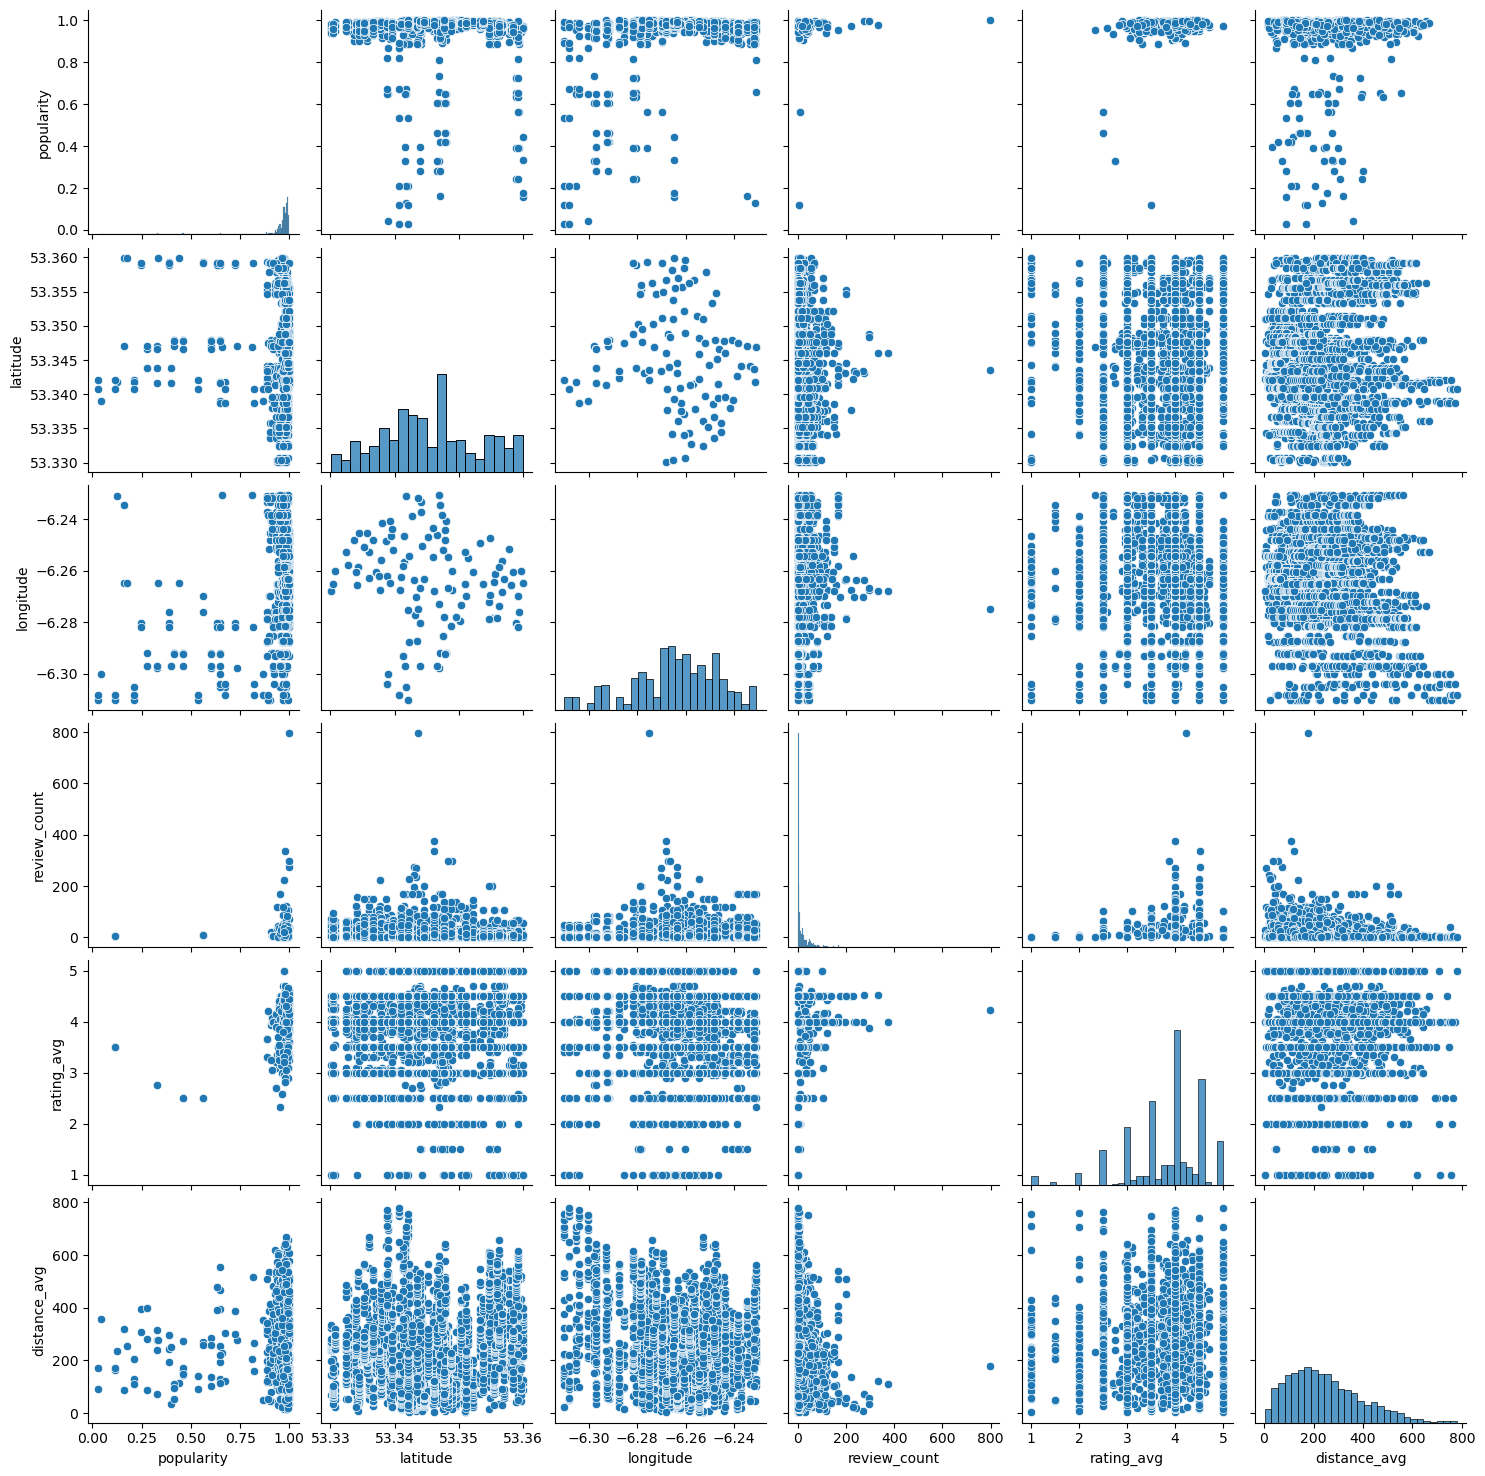

In [81]:
sns.pairplot(merged_outer_df)

Explore whether the distribution for foursquare 'popularity' and foursquare 'rating' results is similar to the distribution for foursquare 'popularity' and yelp 'rating' results.

(0.9, 1.0)

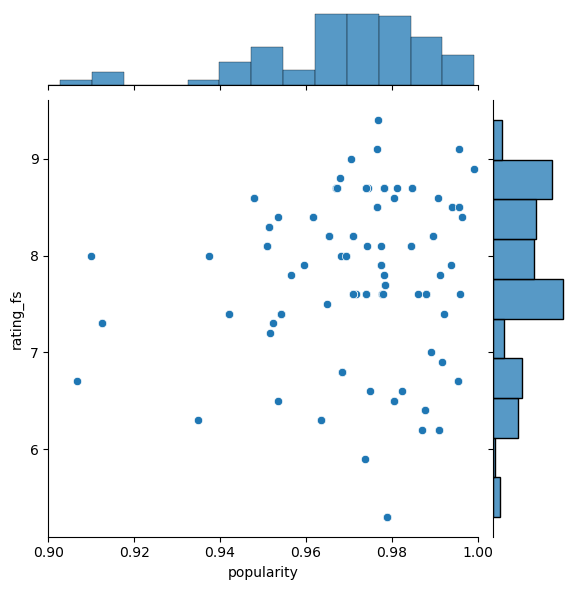

In [119]:
sns.jointplot(x='popularity', y='rating_fs', data= merged_df).ax_marg_x.set_xlim(0.9, 1)

(0.9, 1.0)

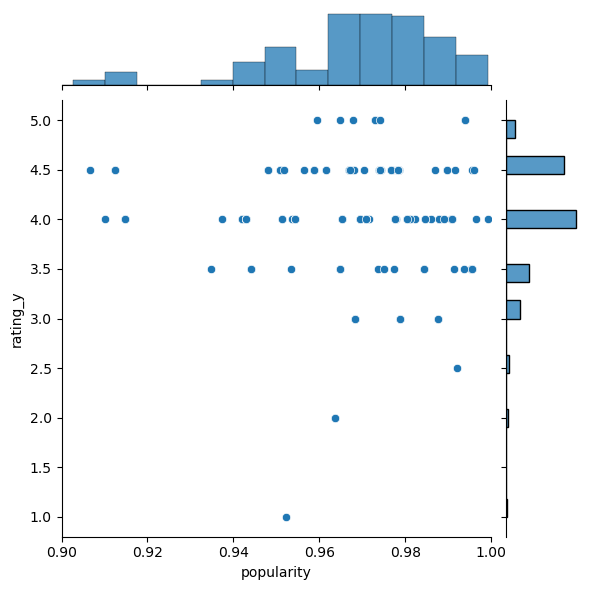

In [120]:
sns.jointplot(x='popularity', y='rating_y', data= merged_df).ax_marg_x.set_xlim(0.9, 1)

### Cleaning steps based on visualizations:

- Drop popularity column because it is unique to the foursquare API. 
    - review_count was kept although it is unique to the yelp API for the sake of investigating general trends.
- Drop review_count outlier (796)
- Drop the 59 rows with missing category information (less than 2% of all data).
- Drop rows with missing rating information (346 rows out of 3204)

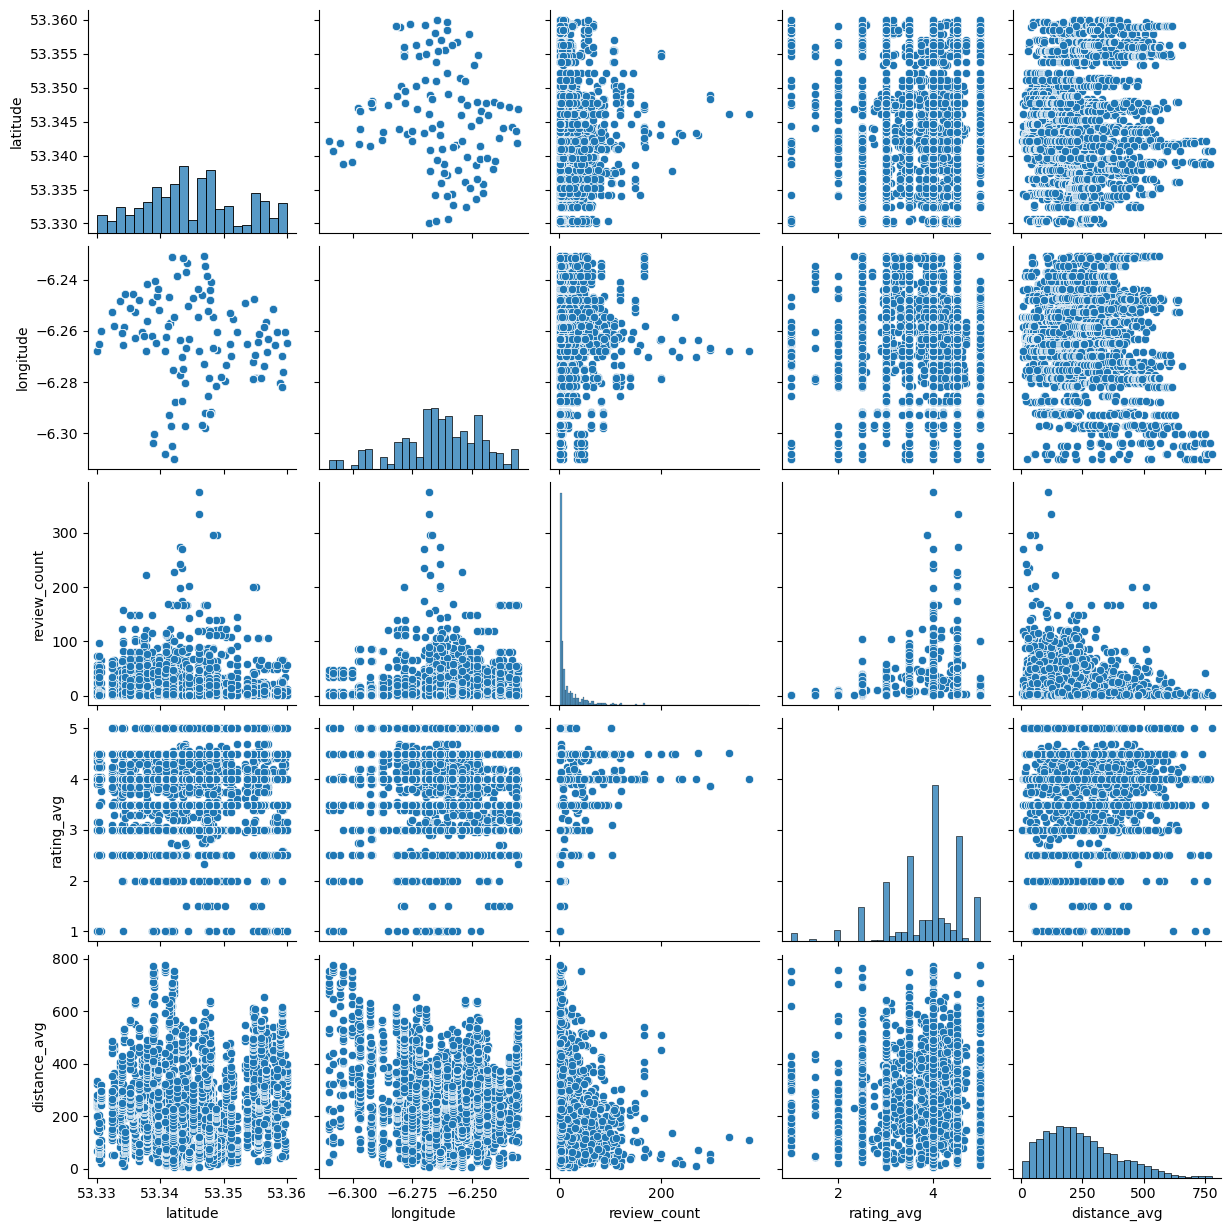

In [154]:
sns.pairplot(merged_outer_df_clean)

### Relationships to analyze:
    - analyze distance vs review_count (how many customers are using bike network)
    - analyze rating avg vs distance avg
    - bike station location density vs food venue location density (do they build more bike stations closer to restaurants)

### Tests to perform:

1. test for normality
2. test for correlations
3. build model (statsmodels)
    - p value significance will be evaluated comparitively, instead of using a strict value of 0.05



In [155]:
import statsmodels.api as sm
from scipy import stats

##### Shapiro-Wilks tests for normality

In [156]:
# Test distance_avg for normality
dnorm = stats.shapiro(merged_outer_df_clean['distance_avg'])
if dnorm.pvalue < 0.05:
    print(f'statistic = {dnorm.statistic}, pvalue = {dnorm.pvalue}')
    print('this variable is not normally distributed')
else:
    print(f'statistic = {dnorm.statistic}, pvalue = {dnorm.pvalue}')
    print('this variable is normally distributed')

statistic = 0.9526271224021912, pvalue = 1.759490777666737e-29
this variable is not normally distributed


In [157]:
# Test review_count for normality
rcnotnull = merged_outer_df_clean.review_count.dropna()
rcnorm = stats.shapiro(rcnotnull)
if rcnorm.pvalue < 0.05:
    print(f'statistic = {rcnorm.statistic}, pvalue = {rcnorm.pvalue}')
    print('this variable is not normally distributed')
else:
    print(f'statistic = {rcnorm.statistic}, pvalue = {rcnorm.pvalue}')
    print('this variable is normally distributed')

statistic = 0.5783182382583618, pvalue = 0.0
this variable is not normally distributed


In [158]:
# Test rating_avg for normality
ranotnull = merged_outer_df_clean.rating_avg.dropna()
ranorm = stats.shapiro(ranotnull)
if ranorm.pvalue < 0.05:
    print(f'statistic = {ranorm.statistic}, pvalue = {ranorm.pvalue}')
    print('this variable is not normally distributed')
else:
    print(f'statistic = {ranorm.statistic}, pvalue = {ranorm.pvalue}')
    print('this variable is normally distributed')

statistic = 0.9211249947547913, pvalue = 2.6755401879544087e-36
this variable is not normally distributed


Shapiro test results interpretation:
- none of the variables of interest are normally distributed.

##### Pearson's Correlation Tests

Distribution of distance vs rating:

<Axes: xlabel='distance_avg', ylabel='rating_avg'>

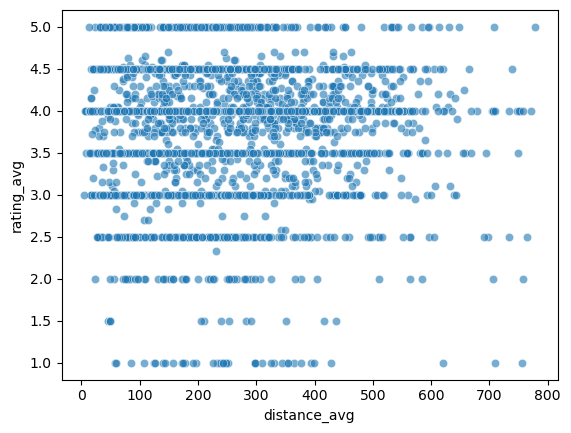

In [159]:
# plot distance vs rating
sns.scatterplot(x=merged_outer_df_clean['distance_avg'], y=merged_outer_df_clean['rating_avg'], alpha=0.6)

Statistical correlation between distance and rating:

In [165]:
stat, p = stats.pearsonr(merged_outer_df_clean['distance_avg'], merged_outer_df_clean['rating_avg'])
print('%0.60f' % p)
if '%0.60f' % p < '0.5':
    print('There is a correlation between these two variables')
else:
    print('There is no correlation between these two variables')

0.522335405872312752428854309982853010296821594238281250000000
There is no correlation between these two variables


Distribution of distance vs review_count (using only values where review_count information is available in the dataframe):

<Axes: xlabel='distance_avg', ylabel='review_count'>

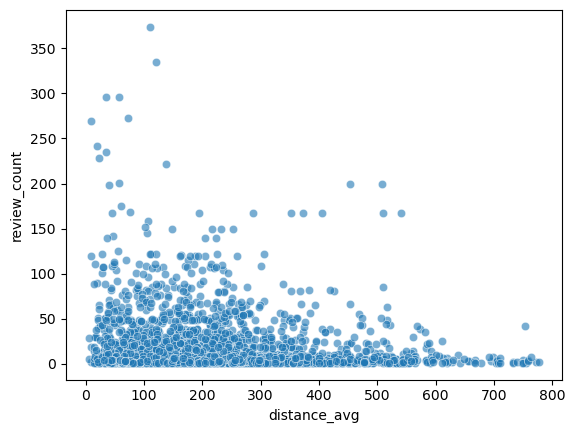

In [171]:
# plot distance vs review_count
merged_outer_df_rcnotnull = merged_outer_df_clean[merged_outer_df_clean['review_count'].notna()]
sns.scatterplot(x=merged_outer_df_rcnotnull['distance_avg'], y=merged_outer_df_rcnotnull['review_count'], alpha=0.6)

Statistical correlation between distance and review count:

In [169]:
merged_outer_df_rcnotnull = merged_outer_df_clean[merged_outer_df_clean['review_count'].notna()]
stat, p = stats.pearsonr(merged_outer_df_rcnotnull['distance_avg'], merged_outer_df_rcnotnull['review_count'])
print('%0.60f' % p)
if '%0.60f' % p < '0.5':
    print('There is a correlation between these two variables')
else:
    print('There is no correlation between these two variables')

0.000000000000017648414638154097737790235264380279556347633912
There is a correlation between these two variables


Investigate relationship between bike station location and number of nearby POIs (venues).

In [178]:
import numpy as np

In [216]:
# count how many businesses are associated with each location
business_count = pd.DataFrame(merged_outer_df_clean.groupby(['latitude','longitude']).size())
business_count

,,0
latitude,longitude,
53.330091,-6.268044,27
53.330362,-6.265163,27
53.330662,-6.260177,27
53.332383,-6.252717,27
53.332763,-6.257942,28
...,...,...
53.359157,-6.281866,21
53.359246,-6.269779,22
53.359405,-6.276142,23


In [217]:
business_count.describe()

,0
count,114.000000
mean,25.070175
std,3.997166
min,6.000000
25%,23.000000
50%,26.000000
75%,28.000000
max,30.000000


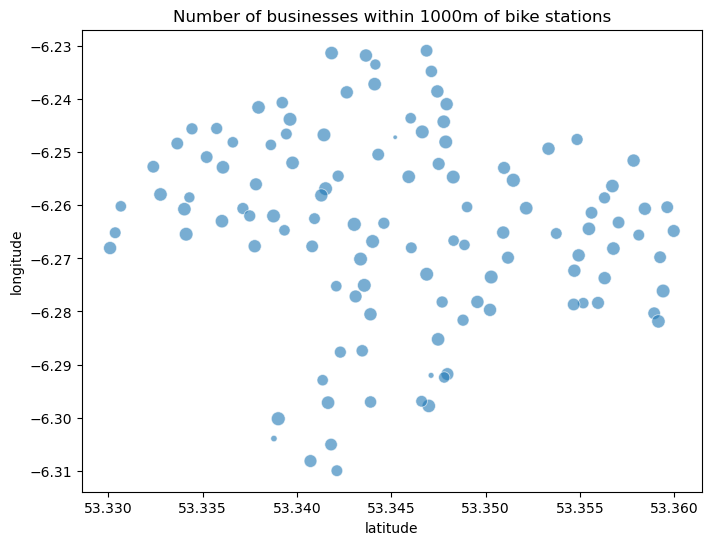

In [218]:
# Create bubble plot that associates number of nearby businesses with bike station location
data = {
    'X': lat_lon['0'].tolist(),
    'Y': lat_lon['1'].tolist(),
    'Size': business_count[0]  # The third variable for bubble size
}

# Create a DataFrame from the data
df = pd.DataFrame(data)

# Create the bubble plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='X', y='Y', size='Size', sizes=(10, 100), alpha=0.6, legend=False)

# Customize the plot
plt.title('Number of businesses within 1000m of bike stations')
plt.xlabel('latitude')
plt.ylabel('longitude')

# Show the plot
plt.show()

Results: most locations appear to have a similar number of businesses within the 1000m radius. 
If time permitted, further analysis using a smaller radius and plotting the correlation between location and business density would be of interest.

##### Provide a visualization that you used as part of your EDA process. Explain the initial pattern or relationship you discoved through this visualization. 

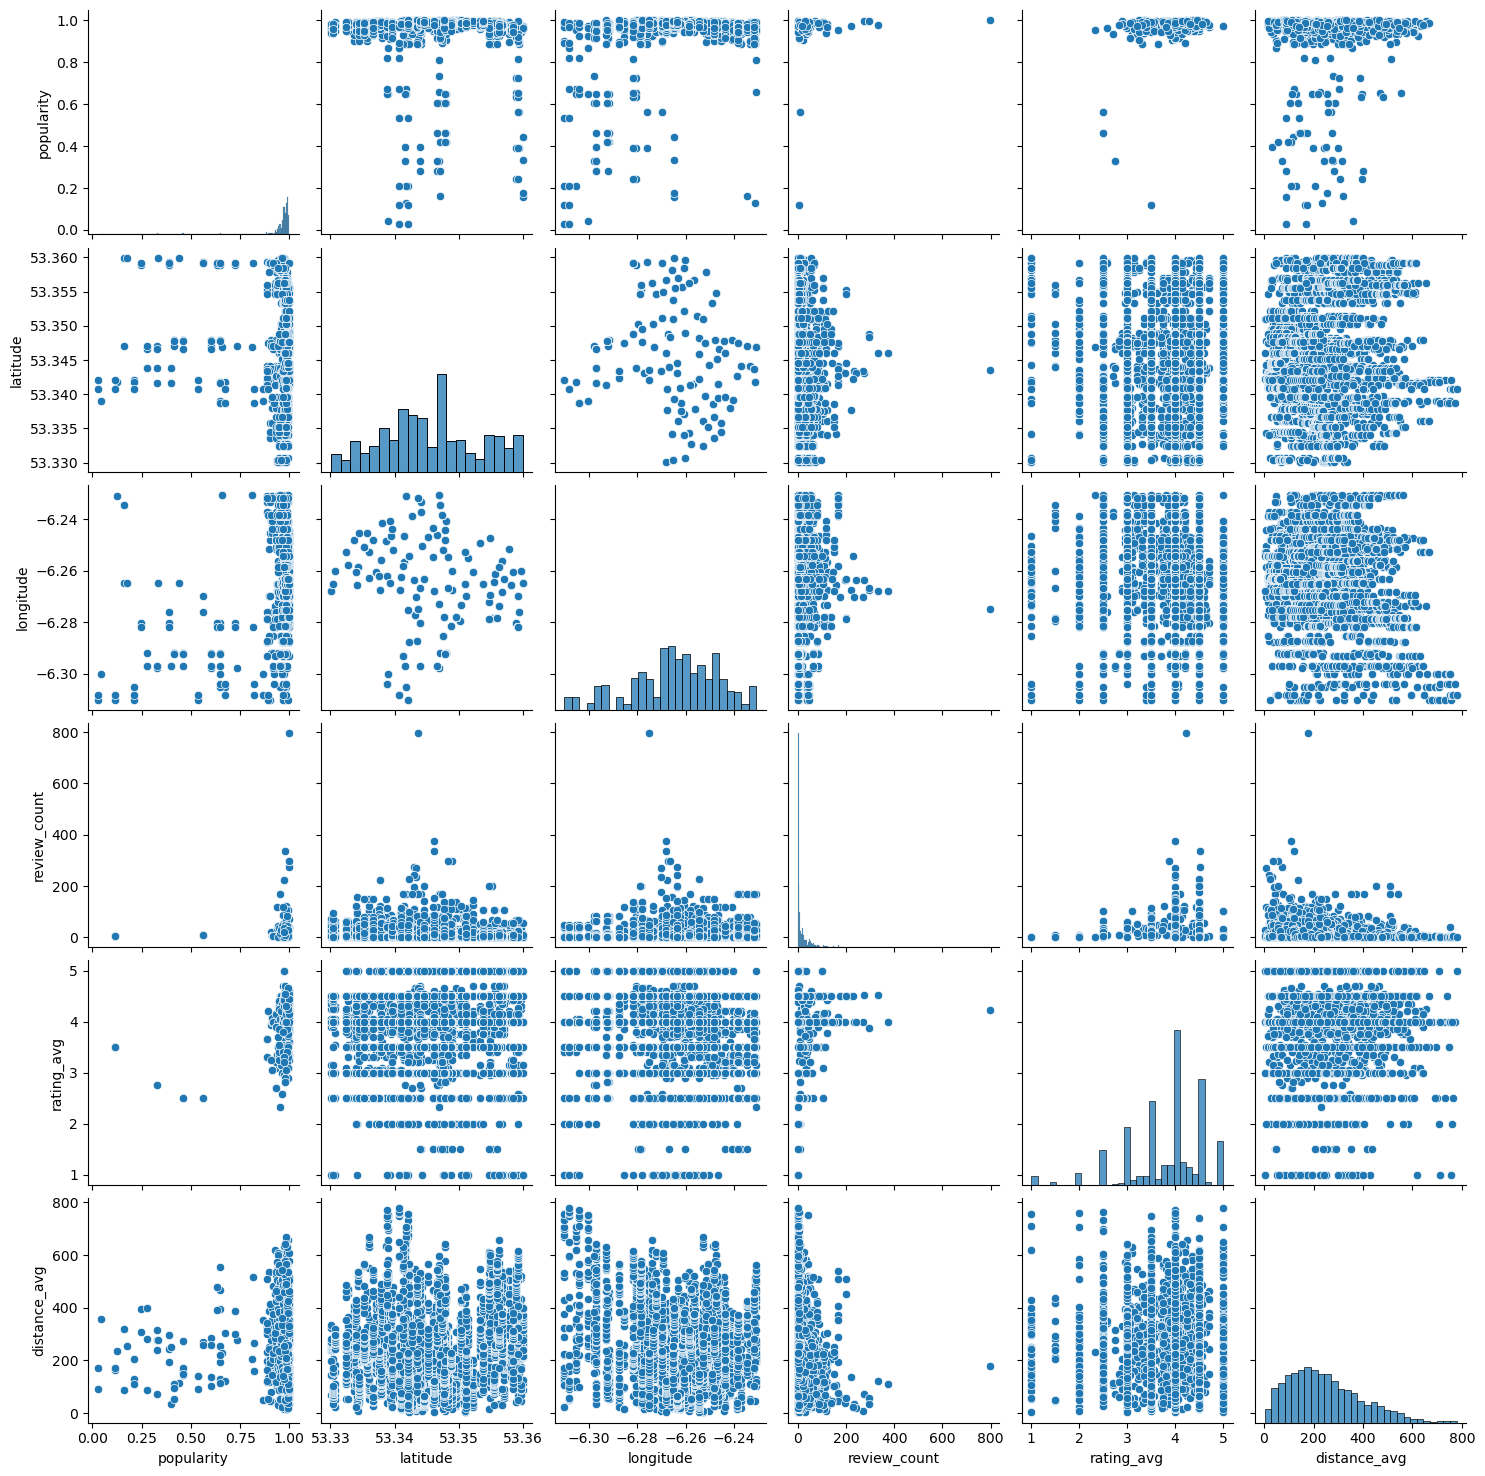

In [234]:
# copied from visualization section above
sns.pairplot(merged_outer_df)

Initial patterns that were observed:
- limited correlation between parameters
- most variables do not appear to be normally distributed
- review_count and popularity appear to be skewed in similar but opposite ways
- rating_avg appears to have two overlapping distributions with similar shapes but different scales (as expected from combining Yelp and Foursquare results)
- location data appears to be fairly uniform in distribution; there is a slight increase in the center of both latitude and longitude distributions, which suggests that the city center has a slightly higher density of bike stations.

# Database

Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - make sure to create your database in your project's data/ directory!)

Objectives:
- create an empty database
- create tables for citybikes, foursquare, and yelp dataframes
- join all three dataframes together

In [219]:
import sqlite3
from sqlite3 import Error

In [220]:
from pathlib import Path

In [221]:
# create empty database
Path('results.db').touch()
# note: in the interest of time, manually moved 'results.db' to 'data' folder

In [222]:
# create connection to the empty database 
def create_connection(path):
    connection = None
    try:
        connection = sqlite3.connect(path)
        print("Connection to SQLite DB successful")
    except Error as e:
        print(f"The error '{e}' occurred")

    return connection

connection = create_connection('../data/results.db')

Connection to SQLite DB successful


In [226]:
# Create function for executing SQL

def execute_read_query(connection, query):
    cursor = connection.cursor()
    result = None
    try:
        cursor.execute(query)
        result = cursor.fetchall()
        return result
    except Error as e:
        print(f"The error '{e}' occurred")


In [228]:
# create dataframe for citybikes.csv
citybikes_df = pd.read_csv('../data/citybikes.csv') # import citybikes results as a dataframe
citybikes_df = citybikes_df.drop(columns=citybikes_df.columns[0], axis=1) # remove duplicated index column
citybikes_df

,name,latitude,longitude,free_bikes,empty_slots
0,GEORGES LANE,53.350230,-6.279696,21,19
1,NORTH CIRCULAR ROAD (O'CONNELL'S),53.357841,-6.251557,22,8
2,PHIBSBOROUGH ROAD,53.356307,-6.273717,17,23
3,SMITHFIELD NORTH,53.349562,-6.278198,29,1
4,CLONMEL STREET,53.336021,-6.262980,0,33
...,...,...,...,...,...
109,JAMES STREET EAST,53.336597,-6.248109,3,27
110,PARNELL SQUARE NORTH,53.353742,-6.265301,6,14
111,FOWNES STREET UPPER,53.344603,-6.263371,19,11
112,SMITHFIELD,53.347692,-6.278214,21,9


In [229]:
# load dataframes into sqlite database tables

citybikes_df.to_sql('citybikes', connection, if_exists='replace', index='False')
foursquare_df.to_sql('foursquare', connection, if_exists='replace', index='False')
yelp_df.to_sql('yelp', connection, if_exists='replace', index='False')


2280

In [230]:
# select all from citybikes table
select_citybikes = "SELECT * FROM citybikes"
citybikes = execute_read_query(connection, select_citybikes)
for station in citybikes:
    print(station)


(0, 'GEORGES LANE', 53.35023, -6.279696, 21, 19)
(1, "NORTH CIRCULAR ROAD (O'CONNELL'S)", 53.357841, -6.251557, 22, 8)
(2, 'PHIBSBOROUGH ROAD', 53.356307, -6.273717, 17, 23)
(3, 'SMITHFIELD NORTH', 53.349562, -6.278198, 29, 1)
(4, 'CLONMEL STREET', 53.336021, -6.26298, 0, 33)
(5, 'AVONDALE ROAD', 53.359405, -6.276142, 12, 23)
(6, 'MOUNT STREET LOWER', 53.33796, -6.24153, 0, 40)
(7, 'CHRISTCHURCH PLACE', 53.343368, -6.27012, 11, 9)
(8, 'GRANTHAM STREET', 53.334123, -6.265436, 22, 7)
(9, 'PEARSE STREET', 53.344304, -6.250427, 26, 4)
(10, 'YORK STREET EAST', 53.338755, -6.262003, 0, 32)
(11, 'EXCISE WALK', 53.347777, -6.244239, 5, 35)
(12, 'FITZWILLIAM SQUARE WEST', 53.336074, -6.252825, 9, 21)
(13, 'PORTOBELLO ROAD', 53.330091, -6.268044, 19, 11)
(14, 'PARNELL STREET', 53.350929, -6.265125, 15, 5)
(15, 'FREDERICK STREET SOUTH', 53.341515, -6.256853, 32, 8)
(16, 'CUSTOM HOUSE', 53.348279, -6.254662, 30, 0)
(17, 'RATHDOWN ROAD', 53.35893, -6.280337, 14, 26)
(18, 'HANOVER QUAY', 53.344115, 

In [233]:
# Join all three tables
join_all = """
SELECT *
FROM citybikes c
FULL OUTER JOIN foursquare f
ON c.latitude = f.latitude AND c.longitude = f.longitude
FULL OUTER JOIN yelp y
ON c.latitude = y.latitude AND c.longitude = y.longitude AND y.name = f.name
LIMIT 20;
"""
all_rows = execute_read_query(connection, join_all)

for row in all_rows:
    print(row)

(0, 'GEORGES LANE', 53.35023, -6.279696, 21, 19, 0, 37, 'V-Face', 0.963409409009112, None, 53.35023, -6.279696, 'Vegan and Vegetarian Restaurant', None, None, None, None, None, None, None, None)
(0, 'GEORGES LANE', 53.35023, -6.279696, 21, 19, 1, 177, 'Light House Cinema', 0.9885458025079266, 9.1, 53.35023, -6.279696, 'Indie Movie Theater', None, None, None, None, None, None, None, None)
(0, 'GEORGES LANE', 53.35023, -6.279696, 21, 19, 2, 250, 'Nutbutter', 0.9577251563883572, None, 53.35023, -6.279696, 'Poke Restaurant', None, None, None, None, None, None, None, None)
(0, 'GEORGES LANE', 53.35023, -6.279696, 21, 19, 3, 285, "JJ's Bar", 0.9958582078893998, 8.3, 53.35023, -6.279696, 'Cocktail Bar', None, None, None, None, None, None, None, None)
(0, 'GEORGES LANE', 53.35023, -6.279696, 21, 19, 4, 286, 'Token', 0.9740352480790654, 8.7, 53.35023, -6.279696, 'Arcade', None, None, None, None, None, None, None, None)
(0, 'GEORGES LANE', 53.35023, -6.279696, 21, 19, 5, 287, 'The Reserve Bar', 

Look at the data before and after the join to validate your data.

_Note: Data validation was primarily done when merging Pandas DataFrames._

Some key observations:
- yelp and foursquare results have limited overlap
- only 157 rows are shared between yelp_df and foursquare_df (see merged_df)

### _Other data exploration that was discarded from final analysis_

In [173]:
lat_lon_init = pd.read_csv('../data/lat_lon.csv')
lat_lon = lat_lon_init.drop(columns=lat_lon_init.columns[0], axis=1)
lat_lon

,0,1
0,53.350230,-6.279696
1,53.357841,-6.251557
2,53.356307,-6.273717
3,53.349562,-6.278198
4,53.336021,-6.262980
...,...,...
109,53.336597,-6.248109
110,53.353742,-6.265301
111,53.344603,-6.263371
112,53.347692,-6.278214


In [177]:
latmin = lat_lon['0'].min()
latmax = lat_lon['0'].max()
lonmin = lat_lon['1'].min()
lonmax = lat_lon['1'].max()


In [180]:
X, Y = np.mgrid[latmin:latmax, lonmin:lonmax]
positions = np.vstack([X.ravel(), Y.ravel()])
values = np.vstack([lat_lon['0'], lat_lon['1']])
kernel = stats.gaussian_kde(values)
Z = np.reshape(kernel(positions).T, X.shape)

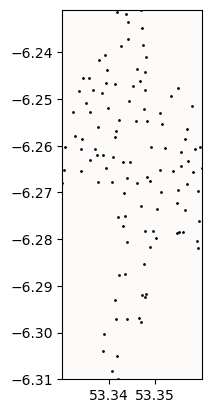

In [183]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.imshow(np.rot90(Z), cmap=plt.cm.gist_earth_r,
          extent=[latmin, latmax, lonmin, lonmax])
ax.plot(lat_lon['0'], lat_lon['1'], 'k.', markersize=2)
ax.set_xlim([latmin, latmax])
ax.set_ylim([lonmin, lonmax])
plt.show()